#완전연결 
단일연결과 비슷
클러스터 쌍에서 가장 거리가 먼데이터를 찾아 거리를 구한후 클러스터를 합친다.

완전연결의 동작 방식 (5단계) 

1.모든 데이터의 거리 행렬을 계산합니다.

2.모든 데이터 포인트를 단일 클러스터로 표현합니다.

3.가장 비슷하지 않은 즉 , 멀리 떨어진 데이터 간 거리에 기초하여 가장 가까운 두 클러스터를 하나로 합쳐줍니다. 

4.유사도 행렬 업데이트

5.하나의 클러스터가 남을떄까지 2~4단계 반복


In [ ]:
#1.모든 데이터의 거리 행렬을 계산합니다.
import numpy as np 
import pandas as pd
np.random.seed(123)
x = np.random.random_sample([5,3])*10
print(x) #5x3 랜덤 행렬 데이터를 10 배 해서 저장 

variables = ['X','Y','Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']

df = pd.DataFrame(x,columns = variables,index = labels) #columns = 세로 index = 가로 
print(df)




[[6.96469186 2.86139335 2.26851454]
 [5.51314769 7.1946897  4.2310646 ]
 [9.80764198 6.84829739 4.80931901]
 [3.92117518 3.43178016 7.29049707]
 [4.38572245 0.59677897 3.98044255]]
             X         Y         Z
ID_0  6.964692  2.861393  2.268515
ID_1  5.513148  7.194690  4.231065
ID_2  9.807642  6.848297  4.809319
ID_3  3.921175  3.431780  7.290497
ID_4  4.385722  0.596779  3.980443


In [ ]:
#2.모든 데이터를 단일 클러스터로 표현 거리행렬을 계산하기 위해  
from scipy.spatial.distance import pdist , squareform
y = pdist(df) #축약된 거리 행렬 계산
print(y)

row_dist = pd.DataFrame(squareform(pdist(df,metric = 'euclidean')),columns = labels,index = labels) #squareform 거리 행렬 벡터를 행렬 형식으로 변환 
from scipy.cluster.hierarchy import linkage 
row_clusters = linkage(row_dist,
                       method = 'complete',
                       metric = 'euclidean')
#초기 데이터 배열을 전달하고 euclidean 지표를 매개변수로 사용한다. 

#help(linkage)
print(row_clusters)
row_clusters = linkage(pdist(df,metric = 'euclidean'),method = 'complete')
print(row_clusters)
row_clusters = linkage(df.values,method = 'complete',metric = 'euclidean')
print(row_clusters)


#군집 결과를 자세히 볼려면 pandas DataFrame 에 넣고 출력해주면 된다,
a = pd.DataFrame(row_clusters,
             columns = ['row label 1', 'row label 2','distance','no. of items in clust.'],
             index = ['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])
print(a)


[4.973534   5.51665266 5.89988504 3.83539555 4.34707339 5.10431109
 6.69823298 7.24426159 8.31659367 4.382864  ]
[[ 0.          4.          6.52197264  2.        ]
 [ 1.          2.          6.72960262  2.        ]
 [ 3.          5.          8.53924727  3.        ]
 [ 6.          7.         12.44482356  5.        ]]
[[0.         4.         3.83539555 2.        ]
 [1.         2.         4.34707339 2.        ]
 [3.         5.         5.89988504 3.        ]
 [6.         7.         8.31659367 5.        ]]
[[0.         4.         3.83539555 2.        ]
 [1.         2.         4.34707339 2.        ]
 [3.         5.         5.89988504 3.        ]
 [6.         7.         8.31659367 5.        ]]
           row label 1  row label 2  distance  no. of items in clust.
cluster 1          0.0          4.0  3.835396                     2.0
cluster 2          1.0          2.0  4.347073                     2.0
cluster 3          3.0          5.0  5.899885                     3.0
cluster 4          6.0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # Remove the CWD from sys.path while we load stuff.


          row label 1  row label 2  distance  no. of items in clust.

cluster 1          0.0          4.0  3.835396                     2.0

cluster 2          1.0          2.0  4.347073                     2.0

cluster 3          3.0          5.0  5.899885                     3.0

cluster 4          6.0          7.0  8.316594                     5.0

             X         Y         Z

ID_0  6.964692  2.861393  2.268515

ID_1  5.513148  7.194690  4.231065

ID_2  9.807642  6.848297  4.809319

ID_3  3.921175  3.431780  7.290497

ID_4  4.385722  0.596779  3.980443

5개의 데이터는 총 4개의 군집을 이룸  첫번쨰와 두번째 열을 완전 연결 방식으로 병합된 클러스터가 됨 

첫번째 클러스터의 label 1 과 label 2는 각각 id0 과 id4 가 병합되는것을 알수 있다 

세번쨰 열은 클러스터 간 거리를 의미 한다 
마지막 열의 의미는 현재 클러스터에 병합된 데이터의 수라고 해석하면 된다.

세번째 클러스터 부터 label 5.0 6.0 7.0 이렇게 나오는데 1과 4과 합쳐진 ID 5 이다.




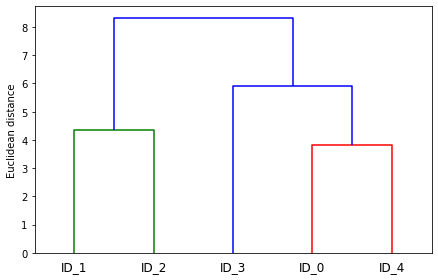

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
row_dendr = dendrogram(row_clusters,
                       labels = labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

계층 군집 덴드로 그램 은 히트맵 과 자주 사용되곤 한다. 
히트 맵 이란 열을 뜻하는 히트와 지도의 맵 을 합성 하는것이다. 
열로 시각화 하는 기법이다. 

데이터 행렬의 개별값을 색으로 보여줄수 있다.


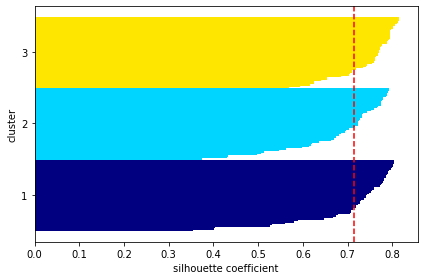

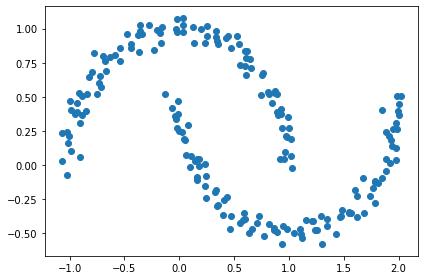

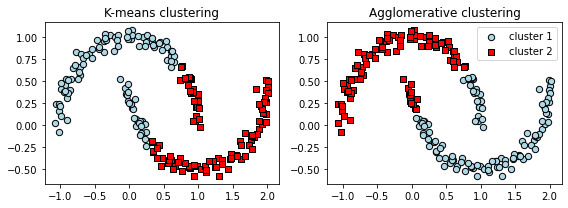

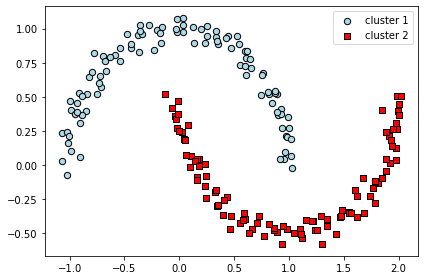

In [1]:
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#군집이 잘 잡힌경우 실루엣 계수가 1에 가까운 수준이다.
#무작위 데이터 셋을 생성할수가 있음
x,y = make_blobs(n_samples=150,n_features=2,centers = 3,cluster_std=0.5,shuffle=True,random_state=0)
km = KMeans(n_clusters=3,
            init = 'random',
            n_init = 10,
            max_iter= 300,
            tol = 1e-04,
            random_state=0)
y_km = km.fit_predict(x)
#print(y_km) #y_km 은 3개의 클러스터 가 한종류씩 배당 되기 떄문에  0,1,2
cluster_labels = np.unique(y_km) #unquie() : 배열의 중복된 원소를 제거루 유일한 원소를 정렬하여 반환
n_clusters = cluster_labels.shape[0] #shape 값은 3

#print(cluster_labels) #중복을 뺏으니 0,1,2 만 나옴

#x : 임의의 데이터 셋 y_km: 예측 클래스 에 대한 계체 metric : 거리측정방식
silhouette_vals = silhouette_samples(x,y_km,metric='euclidean')

y_ax_lower,y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort() #클러스에 맞는 원소들을 정렬
    #print(i,c_silhouette_vals)

    y_ax_upper += len(c_silhouette_vals)

    color = cm.jet(float(i)/n_clusters) #색깔을 설정할수있는 matplot method
    #jet 의특징은 밝은 하늘색에서 연두색 까지 그 사이값만 표현을 한다.

    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1.0,edgecolor = 'none',color = color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color = 'red',linestyle = "--") #데이터의 평균 라인을 그리고 싶을떄 쓰는 함수

plt.yticks(yticks,cluster_labels+1)  #눈금 표시하는 함수
plt.ylabel("cluster")
plt.xlabel("silhouette coefficient")

plt.tight_layout()
plt.show()

#밀집도 기반 군집을 구현해보자
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
x,y = make_moons(n_samples = 200,
                 noise = 0.05, #잡음의크기 0이되면 정확하게 반달을 이룬다.
                 random_state = 0)


plt.scatter(x[:,0],x[:,1])
plt.tight_layout()
plt.show()

from sklearn.cluster import AgglomerativeClustering
f,(ax1,ax2) = plt.subplots(1,2,figsize = (8,3))
km = KMeans(n_clusters = 2,random_state = 0)
y_km = km.fit_predict(x)
ax1.scatter(x[y_km==0,0],x[y_km == 0,1],
            edgecolor = 'black',
            c = 'lightblue',marker = 'o',s = 40,label = 'cluster 1')
ax1.scatter(x[y_km == 1,0],x[y_km == 1,1],
            edgecolor = 'black',c = 'red',marker = 's',s = 40,label = 'cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters = 2,affinity = 'euclidean',linkage ='complete')

y_ac = ac.fit_predict(x)
ax2.scatter(x[y_ac ==0,0],x[y_ac == 0,1],c = 'lightblue',edgecolor = 'black',marker = 'o',s= 40,label = 'cluster 1')
ax2.scatter(x[y_ac == 1,0],x[y_ac == 1,1],c = 'red',edgecolor = 'black',marker = 's',s = 40,label = 'cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

#밀집도 기반 알고리즘 분석
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.2 , min_samples = 5,metric = 'euclidean')
'''
eps : 엡실론 영역
min sample : 최소 개수 
metric: 데이터 분류 기준 
엡실론과 최소 샘플의수가 가장 중요 하다.
'''
y_db = db.fit_predict(x)

plt.scatter(x[y_db ==0,0],x[y_db == 0,1],c = 'lightblue',marker = 'o',s = 40,edgecolors= 'black',label = 'cluster 1')
plt.scatter(x[y_db == 1,0],x[y_db == 1,1],c = 'red',marker = 's',s = 40,edgecolors= 'black',label = 'cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

